In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import category_encoders as ce 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
#importing necessary libraries

# Ques.1(a)

In [2]:
df=pd.read_csv("heart.csv")
df.head()
#loading data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.isnull().sum()
#checking for null values
#no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.nunique()
#unique count of values

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

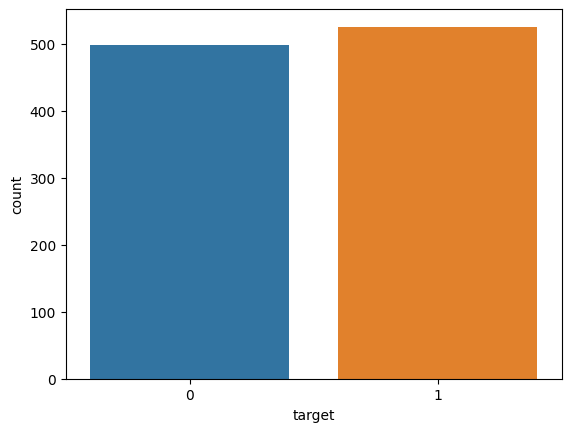

In [6]:
sns.countplot(x="target", data=df)
plt.show()
#checking whether data is balanced or not

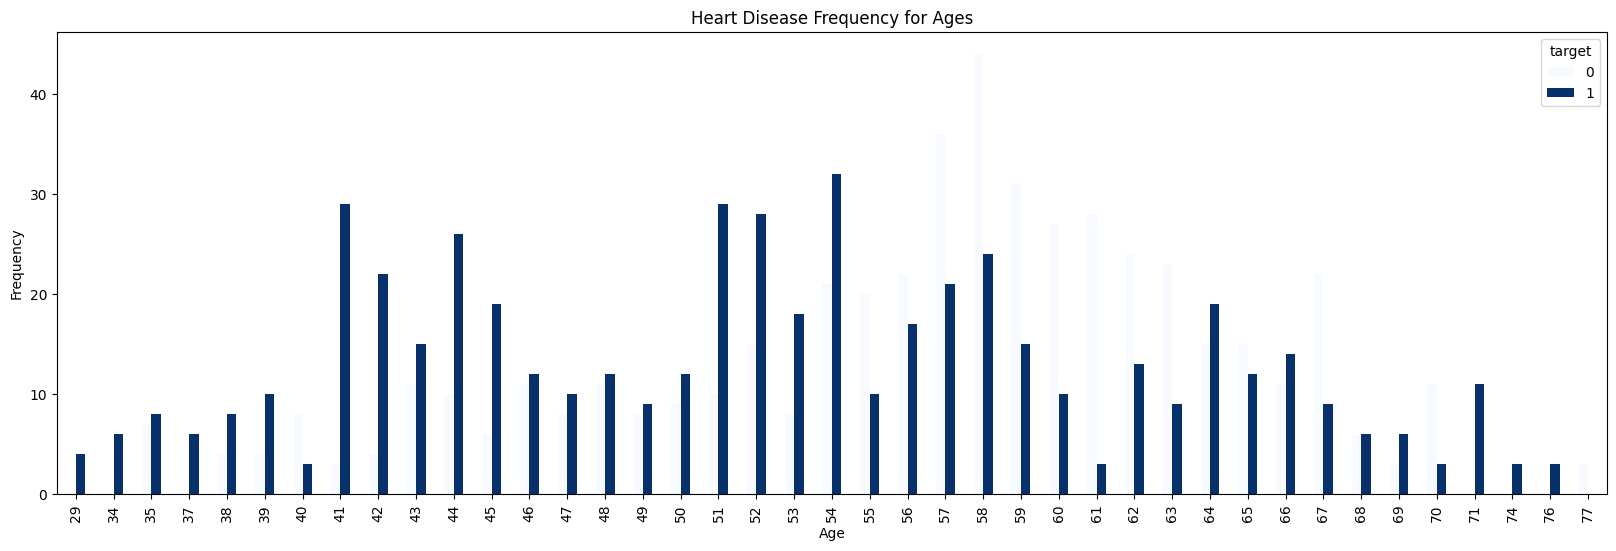

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6),colormap='Blues')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()
#showing target with respect to age

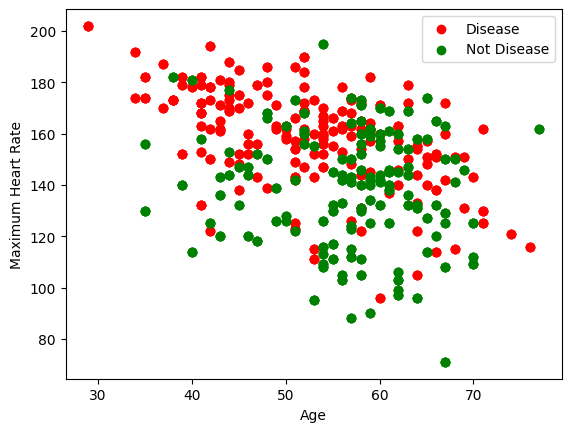

In [8]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()
#scatter plot of target and age

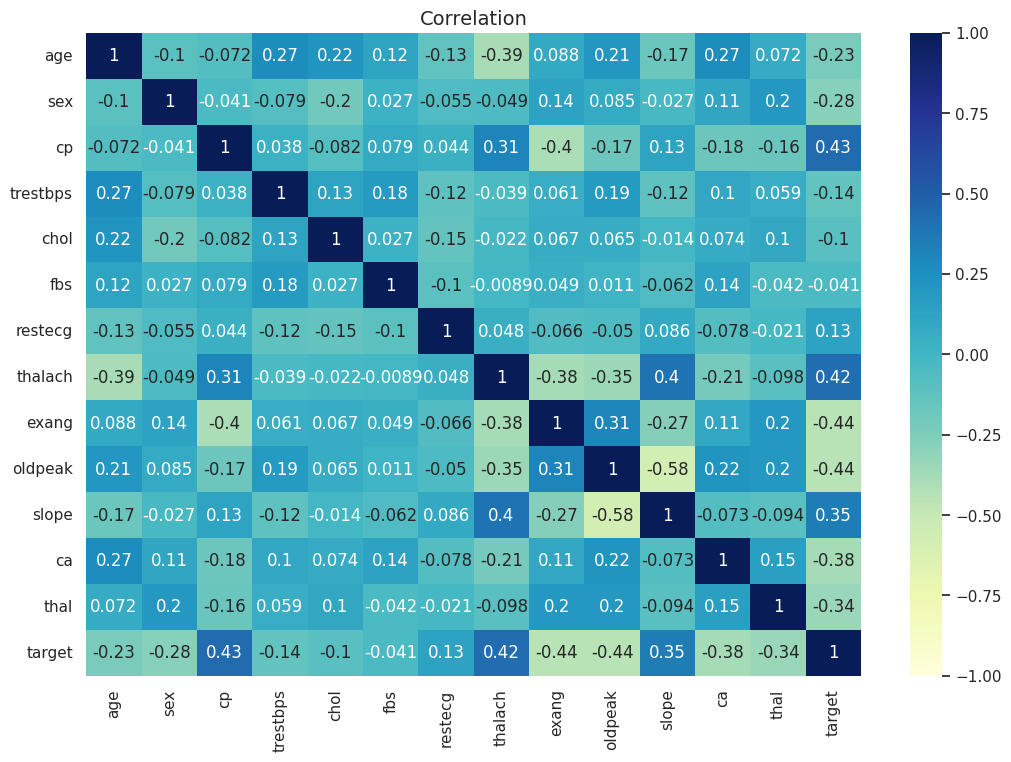

In [9]:
sns.set(rc={'figure.figsize':(12.5,8.35)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True,cmap='YlGnBu')
plt.title("Correlation", fontdict = {'fontsize': 14})
plt.show()
#heatmap to see correlation between variables

In [10]:
x_tr,x_te,y_tr,y_te=train_test_split(df.drop(['target'],axis=1),df['target'],random_state=500)
#splitting data into train and test

In [11]:
y_tr=pd.DataFrame(y_tr)
y_te=pd.DataFrame(y_te)
y_tr.columns=['target']
y_te.columns=['target']
display(x_tr.head())
display(y_tr.head())
display(x_te.head())
display(y_te.head())
#visualising train and test data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
469,67,1,0,160,286,0,0,108,1,1.5,1,3,2
420,57,0,0,128,303,0,0,159,0,0.0,2,1,2
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2
251,45,0,1,112,160,0,1,138,0,0.0,1,0,2
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2


,target
469,0
420,1
578,1
251,1
29,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2
174,54,1,0,110,239,0,1,126,1,2.8,1,1,3
849,52,1,0,128,255,0,1,161,1,0.0,2,1,3
80,50,1,2,140,233,0,1,163,0,0.6,1,1,3
394,63,1,0,130,330,1,0,132,1,1.8,2,3,3


,target
562,1
174,0
849,0
80,0
394,0


In [12]:
print(x_tr.shape)
print(y_tr.shape)

(768, 13)
(768, 1)


In [13]:
print(x_te.shape)
print(y_te.shape)

(257, 13)
(257, 1)


In [14]:
x_tr.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

# Ques1(b)

In [15]:
dt_gini = DecisionTreeClassifier(criterion='gini',random_state=1)
dt_gini.fit(x_tr, y_tr)
#training decision tree using gini index

DecisionTreeClassifier(random_state=1)

In [16]:
y_pr_gini = dt_gini.predict(x_te)
#predicting values using decision tree based on gini index

In [17]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_te, y_pr_gini)))
#reporting accuracy of decision tree based on gini index

Model accuracy score with criterion gini index: 1.0000


In [18]:
dt_ent = DecisionTreeClassifier(criterion='entropy',random_state=50)
dt_ent.fit(x_tr, y_tr)
#training decision tree using entropy

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [19]:
y_pr_ent = dt_ent.predict(x_te)
#predicting values using decision tree based on entropy

In [20]:
print('Model accuracy score with criterion ent: {0:0.4f}'. format(accuracy_score(y_te, y_pr_ent)))
#reporting accuracy of decision tree based on entropy

Model accuracy score with criterion ent: 0.9883


# Ques1(c)

In [21]:
x1=tree.export_graphviz(dt_gini.fit(x_tr, y_tr),filled=True)
# making a visual representation of decision tree using gini index

In [22]:
import pydotplus
graph1 = pydotplus.graphviz.graph_from_dot_data(x1)
#decoding dot file 

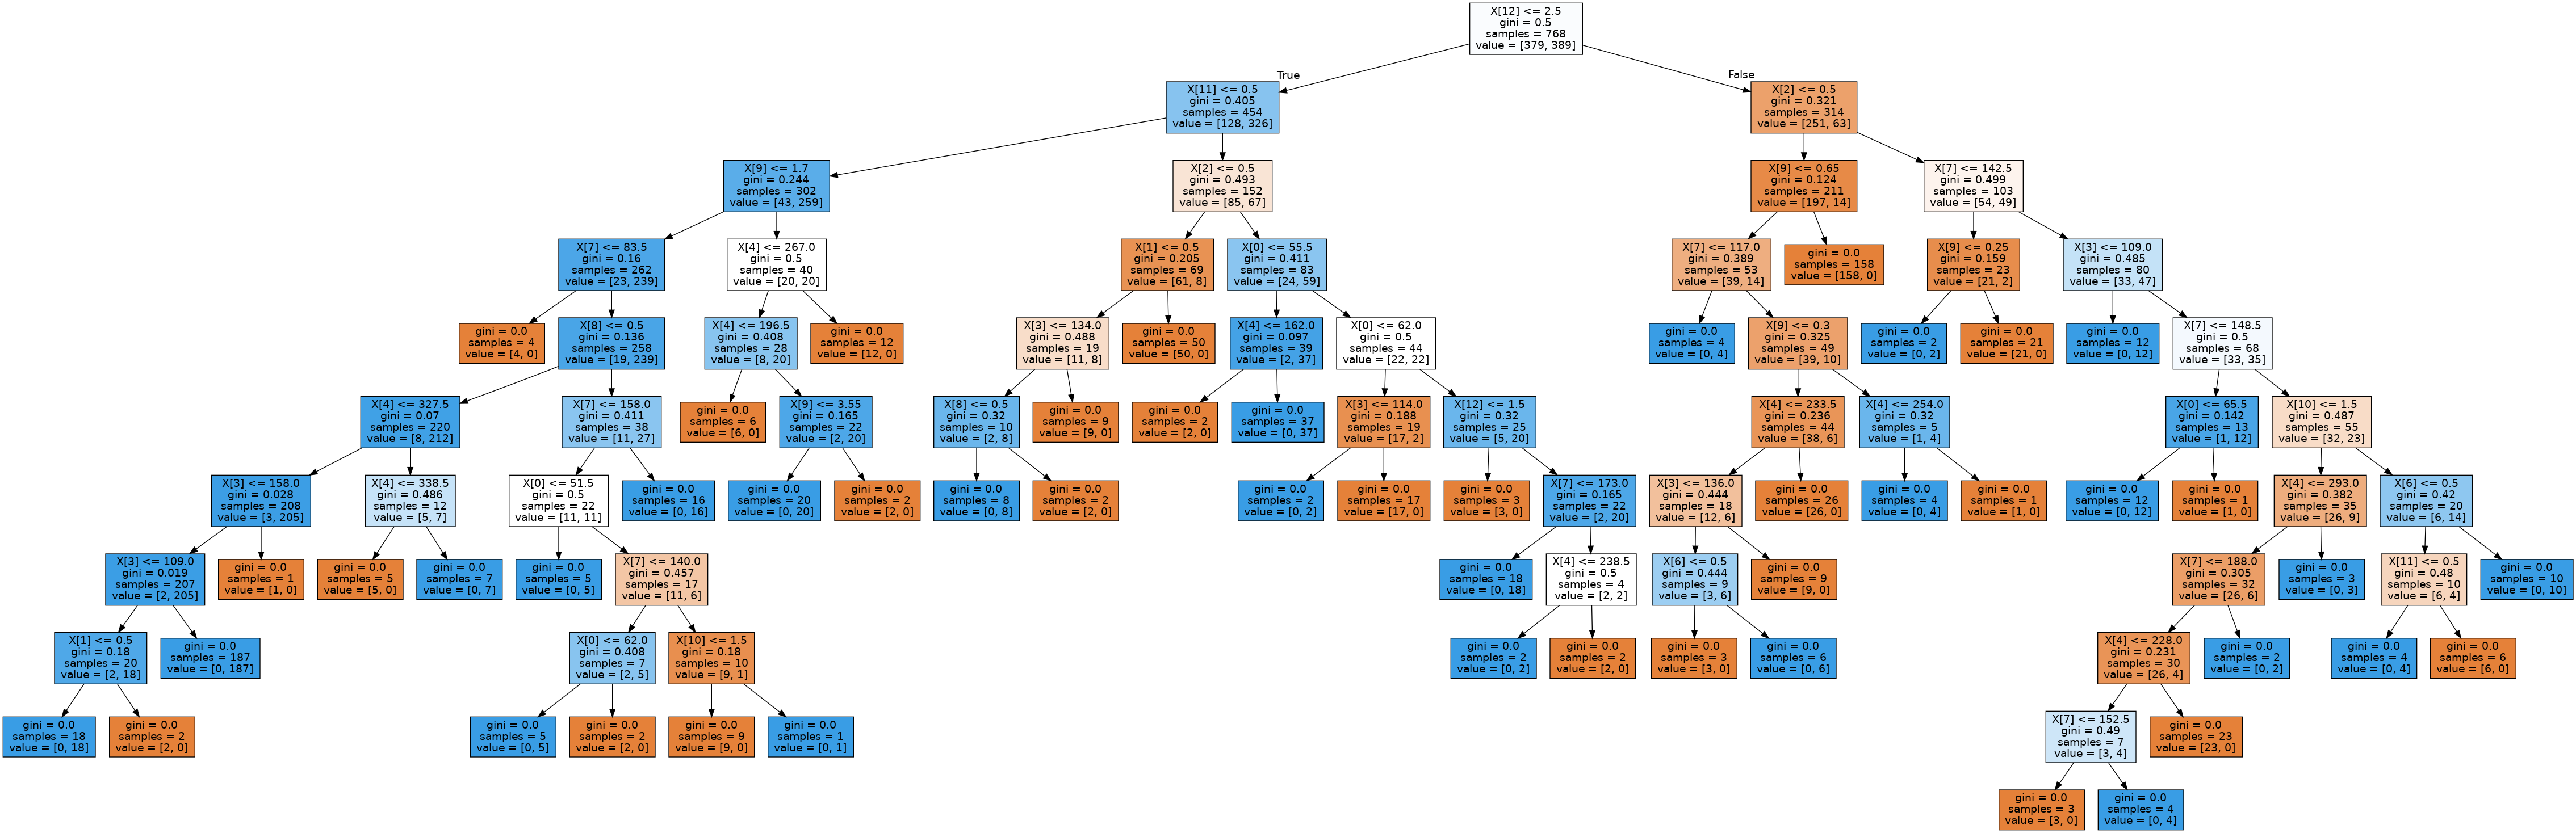

In [23]:
from IPython.display import Image
Image(graph1.create_png())
#converting graph to image

In [24]:
x2=tree.export_graphviz(dt_ent.fit(x_tr, y_tr),filled=True)
# making a visual representation of decision tree using entropy

In [25]:
graph2 = pydotplus.graphviz.graph_from_dot_data(x2)
#decoding dot file 

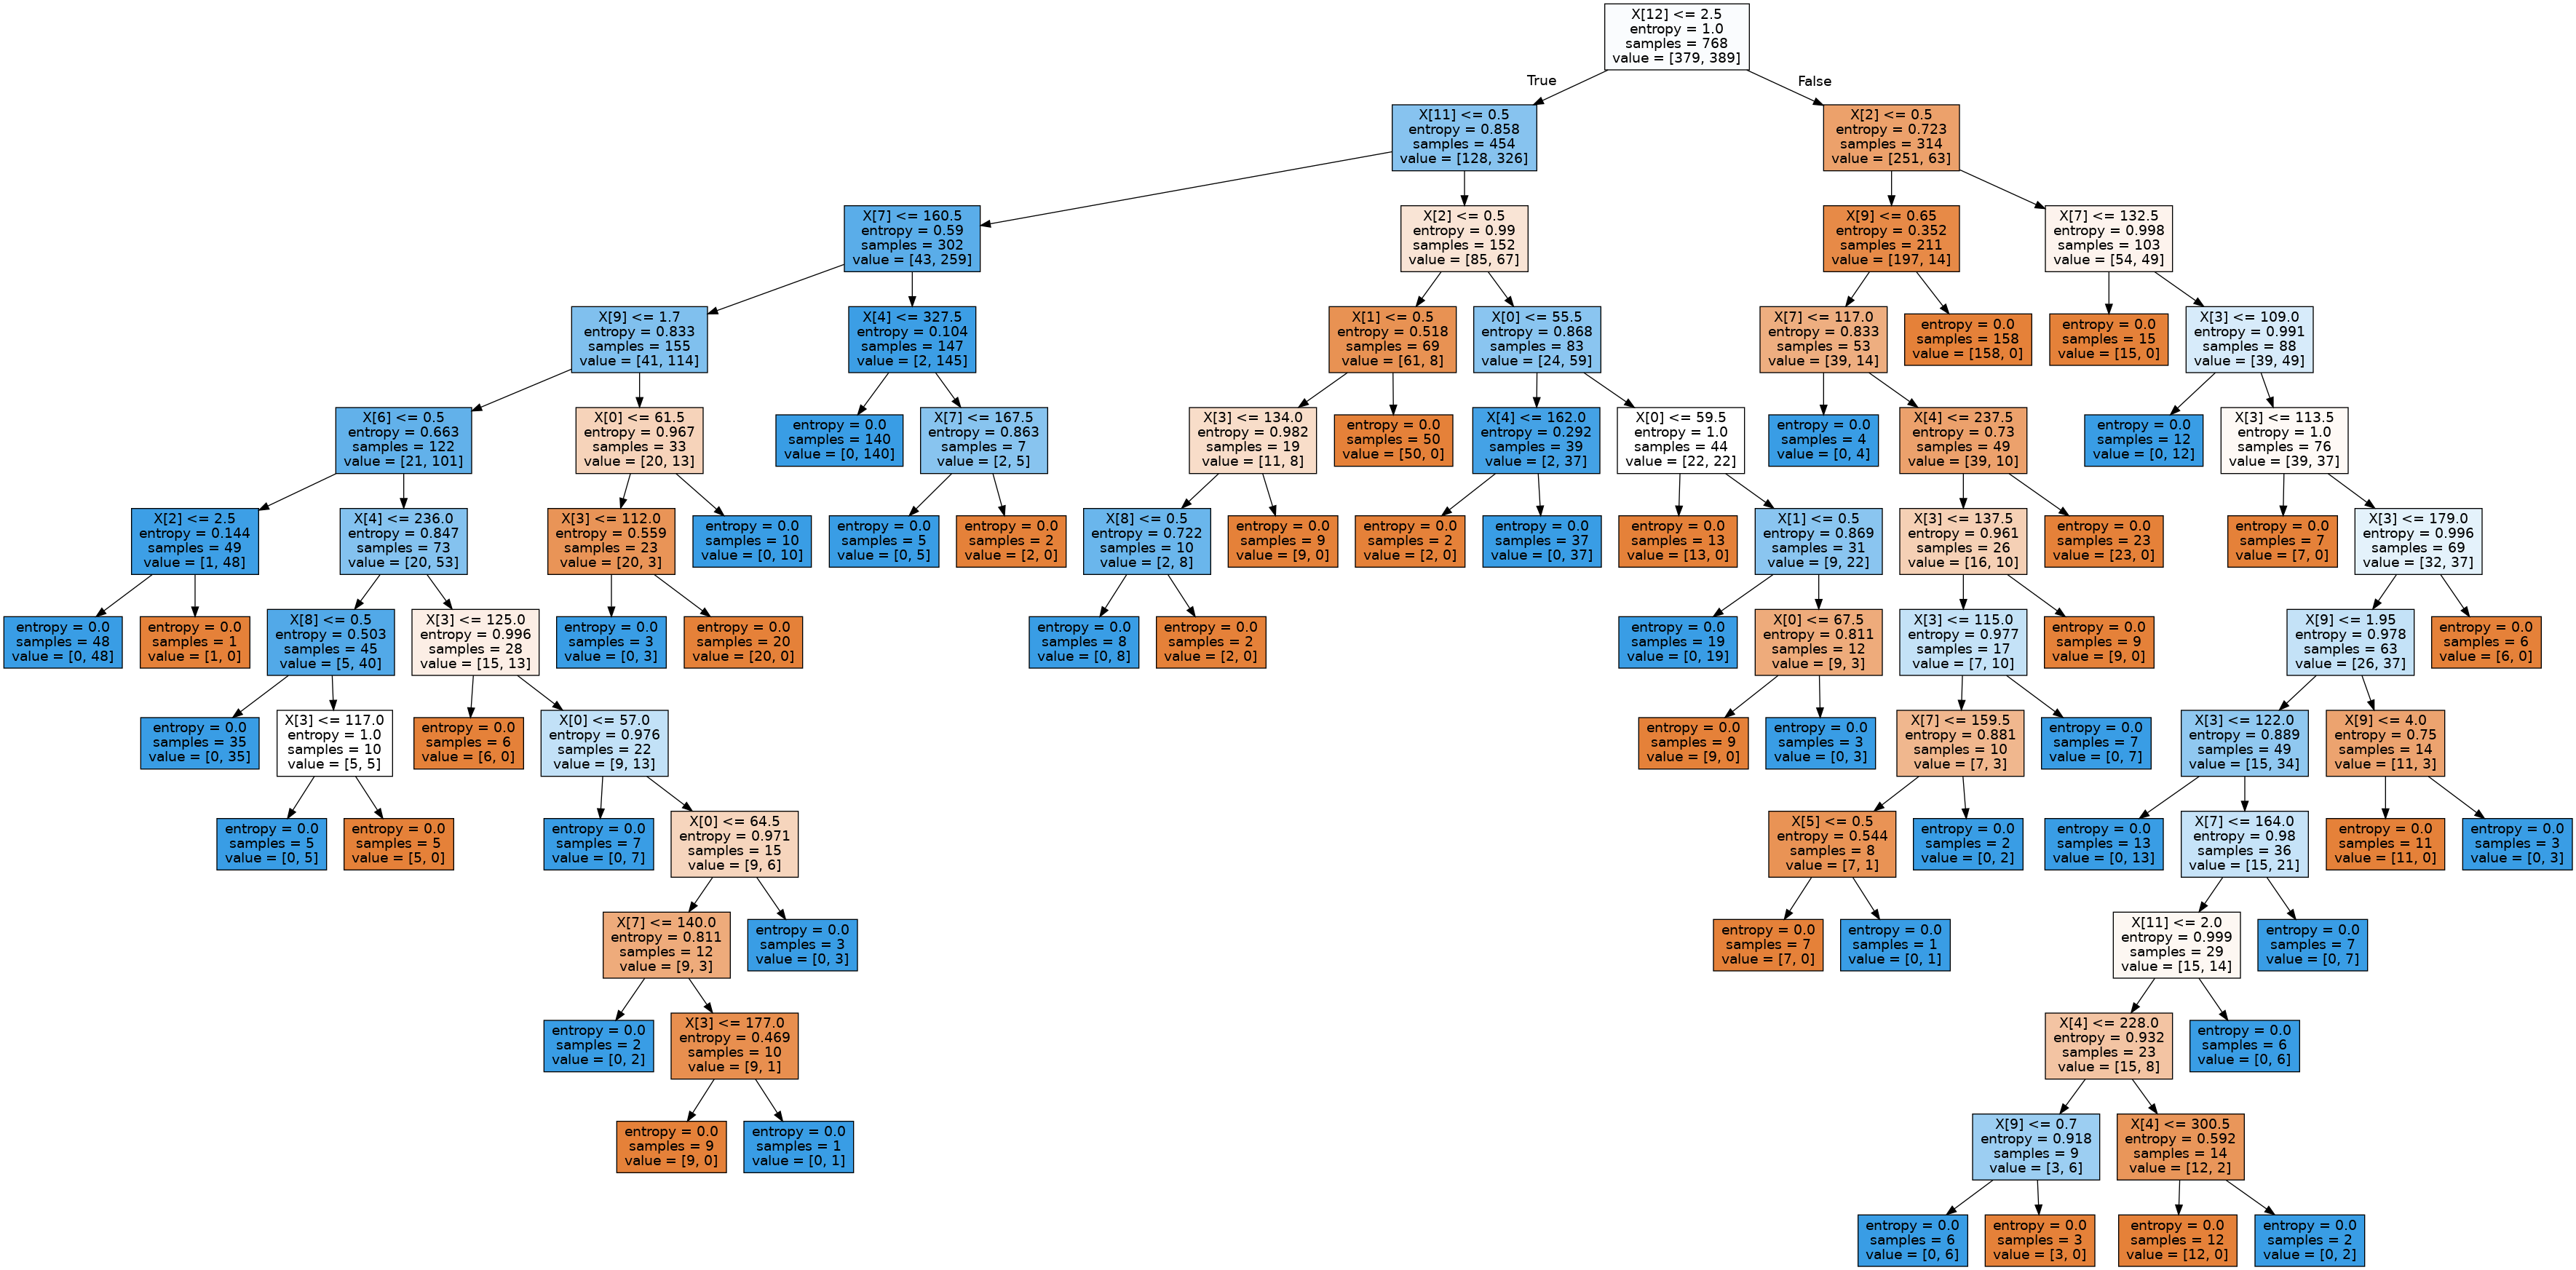

In [26]:
Image(graph2.create_png())
#converting graph to image

# Ques1(d)

In [27]:
tr_acc=[]
te_acc=[]
m_s=[]
for i in range(2,101,2):
    m_s.append(i)
    temp=DecisionTreeClassifier(criterion='gini',random_state=1,min_samples_split=i)
    temp=temp.fit(x_tr,y_tr)
    temp_pred=temp.predict(x_tr)
    tr_acc.append(accuracy_score(y_tr, temp_pred))
    temp_pred=temp.predict(x_te)
    te_acc.append(accuracy_score(y_te, temp_pred))
# Training decision trees with different values of the minimum number 
# of samples required to split an internal node.

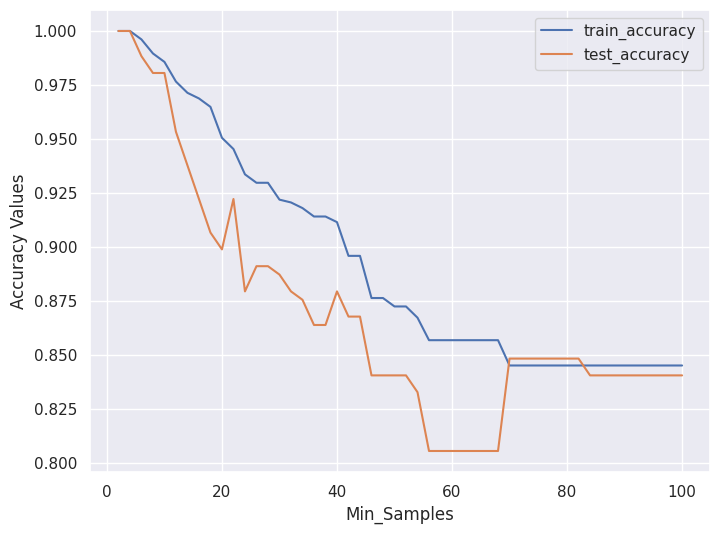

In [28]:
plt.figure(figsize=(8,6))
plt.plot(m_s,tr_acc, label = 'train_accuracy')
plt.plot(m_s,te_acc, label = 'test_accuracy')
plt.xlabel('Min_Samples')
plt.ylabel('Accuracy Values')
plt.legend()
plt.show()
# Ploting the curve
# between training and testing accuracy vs ’minimum number of 
# samples required to split’ to support your
# analysis.

according to the graph accuracies are decreasing as we are increasing the value of hyperparameter 'min_sample_split' the max accuracies are at 2 so optimum value according to graph for the hyper parameter is 2

In [29]:
tr_acc2=[]
te_acc2=[]
m_s2=[]
for i in range(2,101,2):
    m_s2.append(i)
    temp=DecisionTreeClassifier(criterion='entropy',random_state=50,min_samples_split=i)
    temp=temp.fit(x_tr,y_tr)
    temp_pred=temp.predict(x_tr)
    tr_acc2.append(accuracy_score(y_tr, temp_pred))
    temp_pred=temp.predict(x_te)
    te_acc2.append(accuracy_score(y_te, temp_pred))
# Training decision trees with different values of the minimum number 
# of samples required to split an internal node.

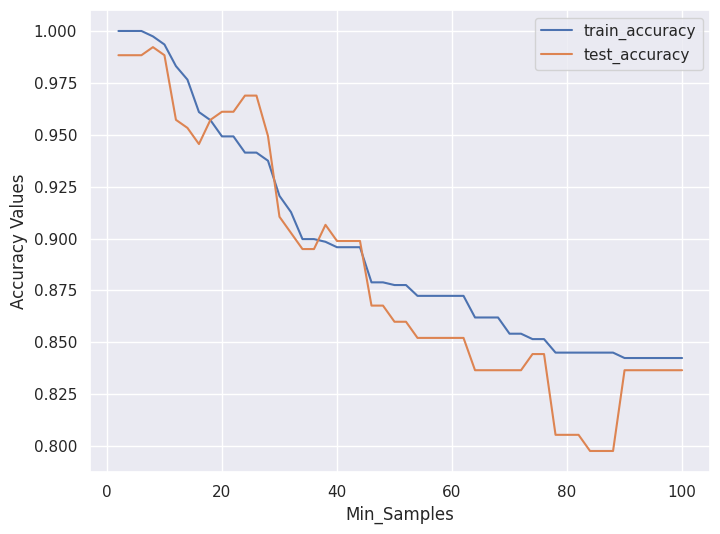

In [30]:
plt.figure(figsize=(8,6))
plt.plot(m_s2,tr_acc2, label = 'train_accuracy')
plt.plot(m_s2,te_acc2, label = 'test_accuracy')
plt.xlabel('Min_Samples')
plt.ylabel('Accuracy Values')
plt.legend()
plt.show()
# Ploting the curve
# between training and testing accuracy vs ’minimum number of 
# samples required to split’ to support your
# analysis.

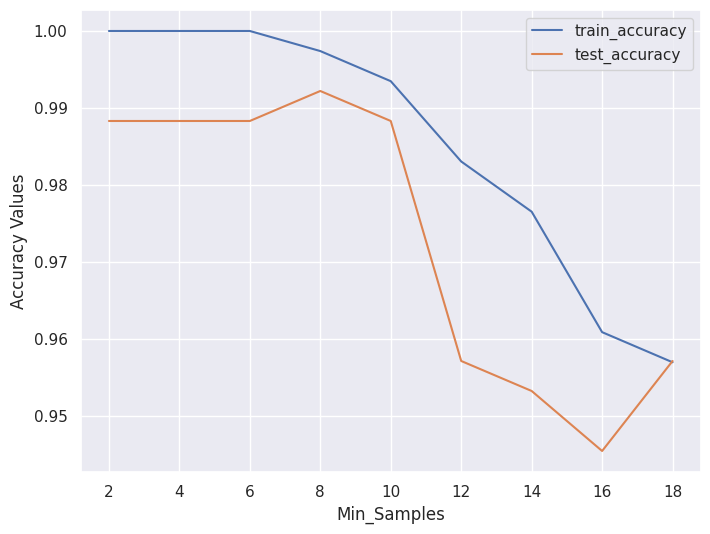

In [31]:
plt.figure(figsize=(8,6))
plt.plot([2,4,6,8,10,12,14,16,18],tr_acc2[:9], label = 'train_accuracy')
plt.plot([2,4,6,8,10,12,14,16,18],te_acc2[:9], label = 'test_accuracy')
plt.xlabel('Min_Samples')
plt.ylabel('Accuracy Values')
plt.legend()
plt.show()
#looking closely to see where the test accuracies are maximum

according to the graph of hyperparameter 'min_sample_split' the max accuracies are at 8 so optimum value according to graph for the hyper parameter is 8